# Exploratory Data Analysis

In [1]:
import sys
import pandas as pd
sys.path.append('../')
from utils.visualizations import Visualization, TextPattern

# Data

In [2]:
df = pd.read_csv("./Data/clean_teste_indicium_precificacao.csv")
print(f"Shape: {df.shape}")
df.head()

Shape: (47169, 12)


nome bairro_group  \
0                             Skylit Midtown Castle    Manhattan   
1               THE VILLAGE OF HARLEM....NEW YORK !    Manhattan   
2  Entire Apt: Spacious Studio/Loft by central park    Manhattan   
3         Large Cozy 1 BR Apartment In Midtown East    Manhattan   
4                                   BlissArtsSpace!     Brooklyn   

               bairro  latitude  longitude        room_type  price  \
0             Midtown  40.75362  -73.98377  Entire home/apt    225   
1              Harlem  40.80902  -73.94190     Private room    150   
2         East Harlem  40.79851  -73.94399  Entire home/apt     80   
3         Murray Hill  40.74767  -73.97500  Entire home/apt    200   
4  Bedford-Stuyvesant  40.68688  -73.95596     Private room     60   

   minimo_noites  numero_de_reviews  reviews_por_mes  \
0              1                 45             0.38   
1              3                  0             0.00   
2             10                  9             0.10   
3              3                 74             0.59   
4             45                 49             0.40   

   calculado_host_listings_count  disponibilidade_365  
0                              2                  355  
1                              1                  365  
2                              1                    0  
3                              1                  129  
4                              1                    0

In [3]:
visualizer = Visualization(df)

# Univariate Analysis

## Numerical Features

In [6]:
df.describe()

latitude     longitude         price  minimo_noites  \
count  47169.000000  47169.000000  47169.000000   47169.000000   
mean      40.729000    -73.951994    137.245161       6.831351   
std        0.054796      0.045616    103.643971      16.227357   
min       40.499790    -74.244420     10.000000       1.000000   
25%       40.689890    -73.982550     69.000000       1.000000   
50%       40.723090    -73.955400    105.000000       3.000000   
75%       40.763320    -73.936100    175.000000       5.000000   
max       40.913060    -73.712990    799.000000     365.000000   

       numero_de_reviews  reviews_por_mes  calculado_host_listings_count  \
count       47169.000000     47169.000000                   47169.000000   
mean           20.574530         0.990563                       5.058534   
std            35.600753         1.343469                      20.246202   
min             0.000000         0.000000                       1.000000   
25%             1.000000         0.040000                       1.000000   
50%             5.000000         0.350000                       1.000000   
75%            22.000000         1.470000                       2.000000   
max           214.000000         6.800000                     232.000000   

       disponibilidade_365  
count         47169.000000  
mean            109.627997  
std             130.613948  
min               0.000000  
25%               0.000000  
50%              39.000000  
75%             217.000000  
max             365.000000

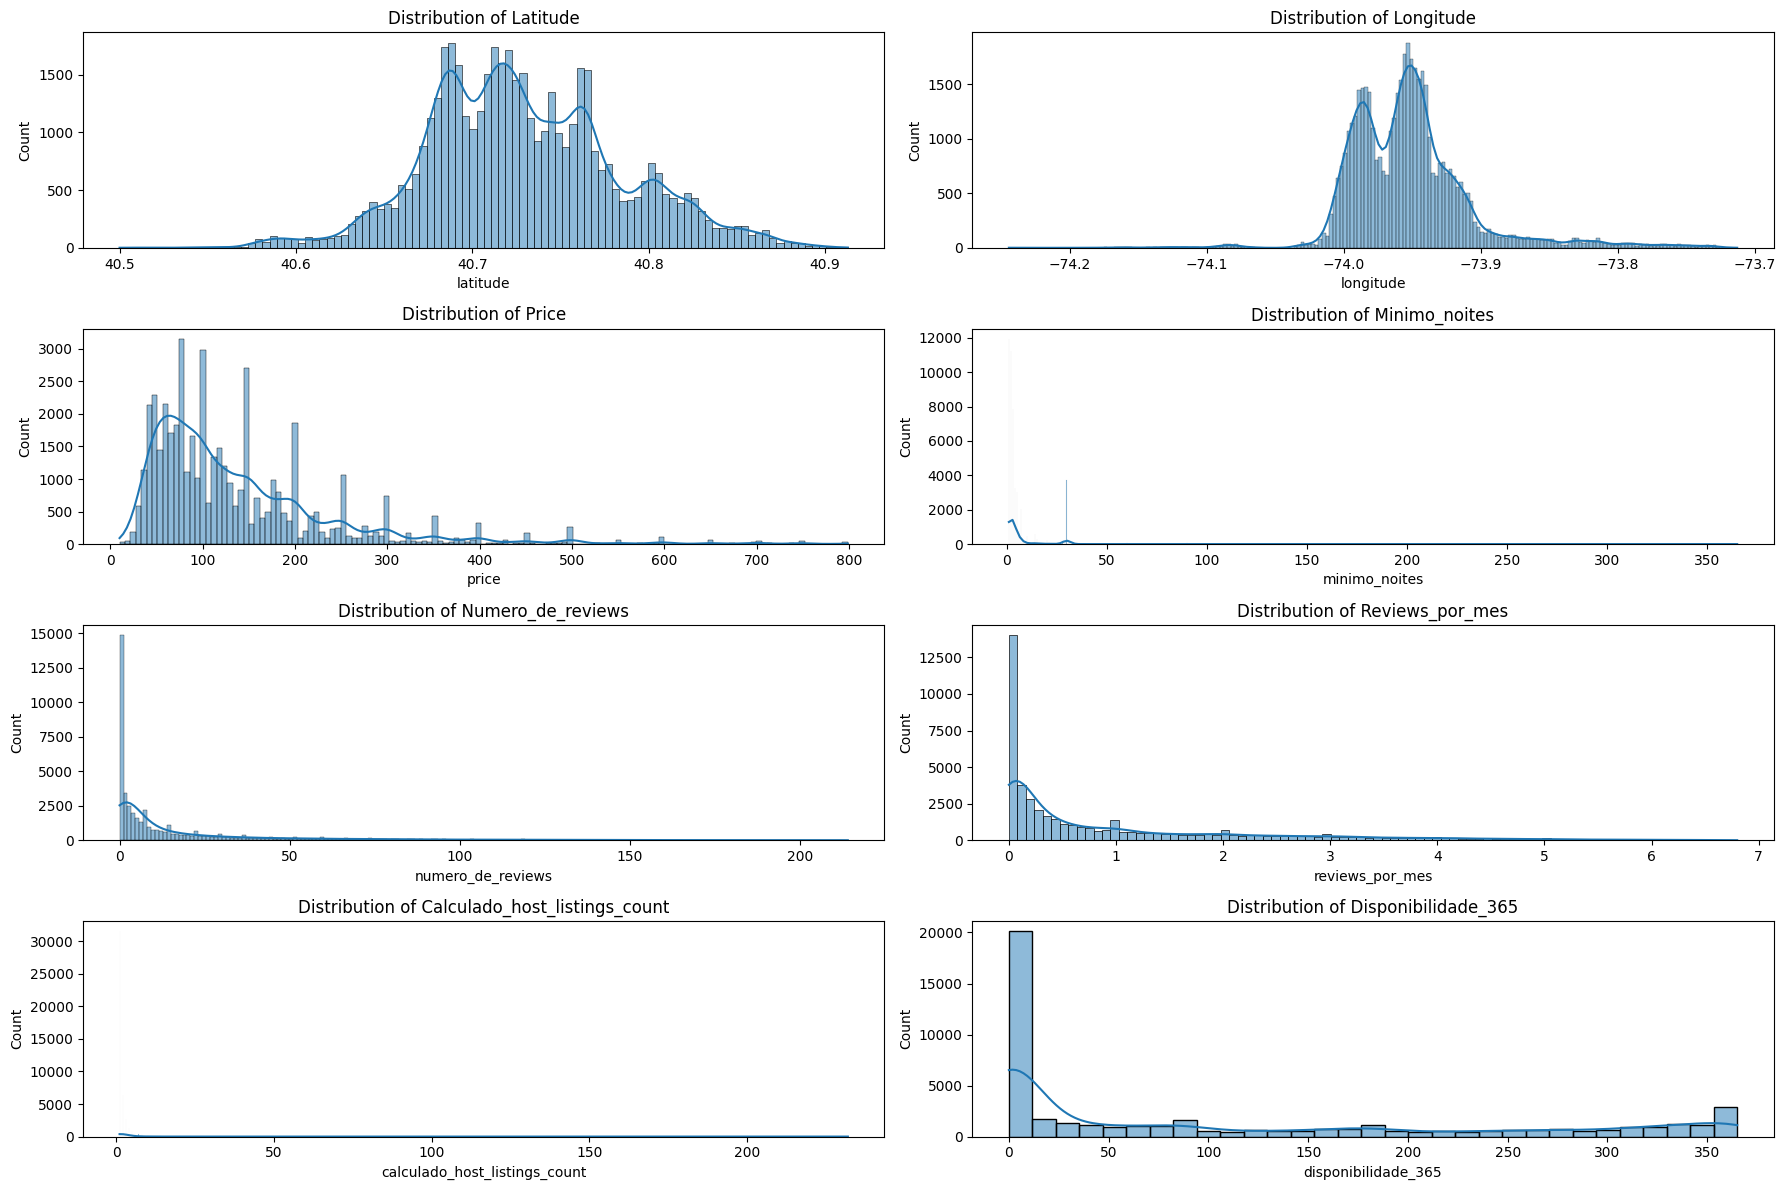

In [7]:
visualizer.numerical_univariate_analysis(4, 2)

### Observations:
- All columns are far from a normal distribution
- Excluding the coordinates columns, all others have a heavily positively skewed distribution, with mode < median < mean
- The values of the columns are on different scales, with some columns ranging from units to hundreds and others in the units
### Impact:
- It would be interesting to test some methods to make the columns distributions more closely resemble a gaussian one
- Scaling the data will be necessary for better results, but the scaler will be chosen after the columns are close to a gaussian distribution and taking into account any remaining outliers

## Categorical Features

In [28]:
# Checking the amount of unique values in each categorical column
for i in df.select_dtypes("object"):
    print(f"Unique {i}: {len(df[i].unique())}")

Unique nome: 46220
Unique bairro_group: 5
Unique bairro: 220
Unique room_type: 3


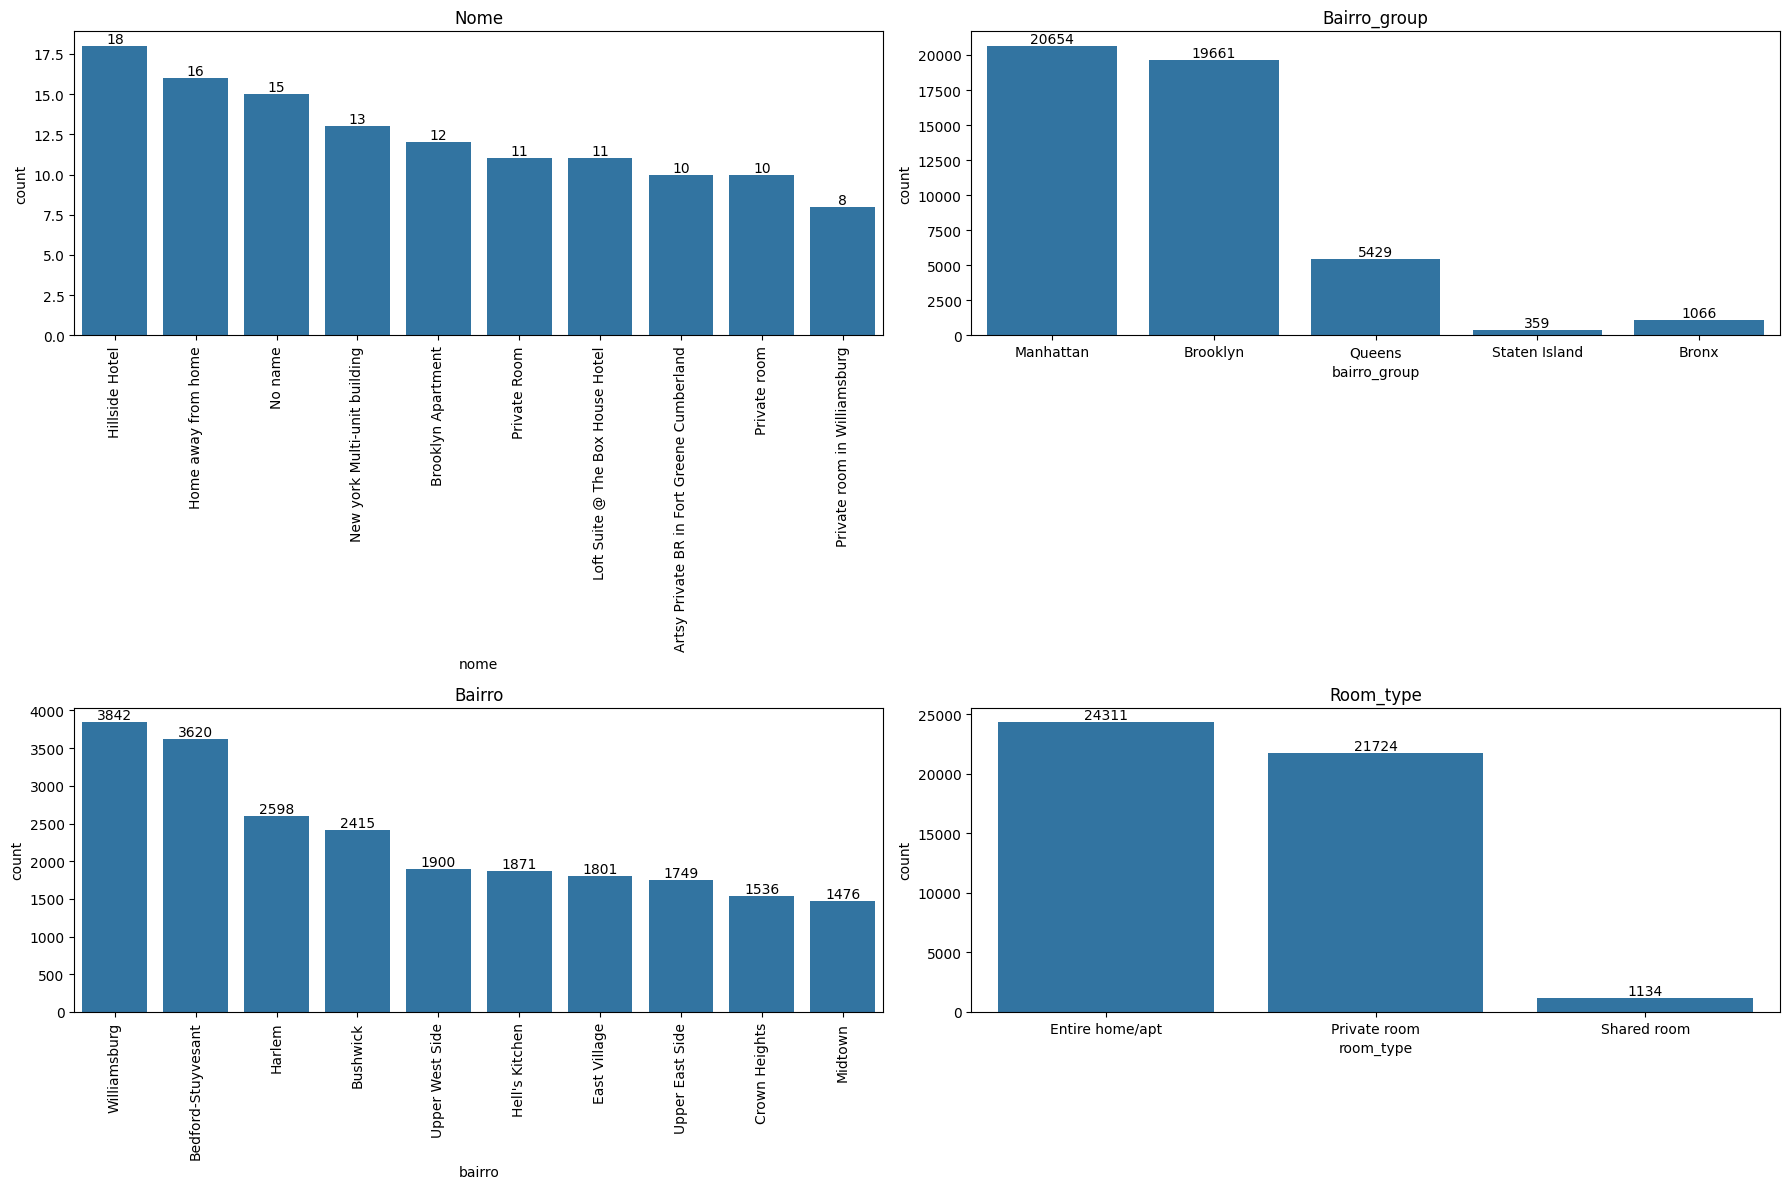

In [9]:
visualizer.categorical_univariate_analysis(2, 2)

### Observations:
- Since the columns `nome` and `bairro` have an extreme amount of values, only the top 10 were plotted
- The column `nome` shows that the only type of ads that has the same names are the ones with generic names, with a hotel in first place and the rest being the room type or room type combined with its location
- `bairro_group` shows that Manhattan and Brooklyn are by far the most popular locations, with approximately 40 thousand ads in these two neighborhood groups
- The top two neighborhoods are Williamsburg and Bedford-Stuyvesant, each with more than 3500 ads. The rest of the top 10 neighborhoods are in the 2000 ads range
- `room_type` is dominated by the categories entire home/apt and private room, which is understandable

# Features x Target

## Numerical Features

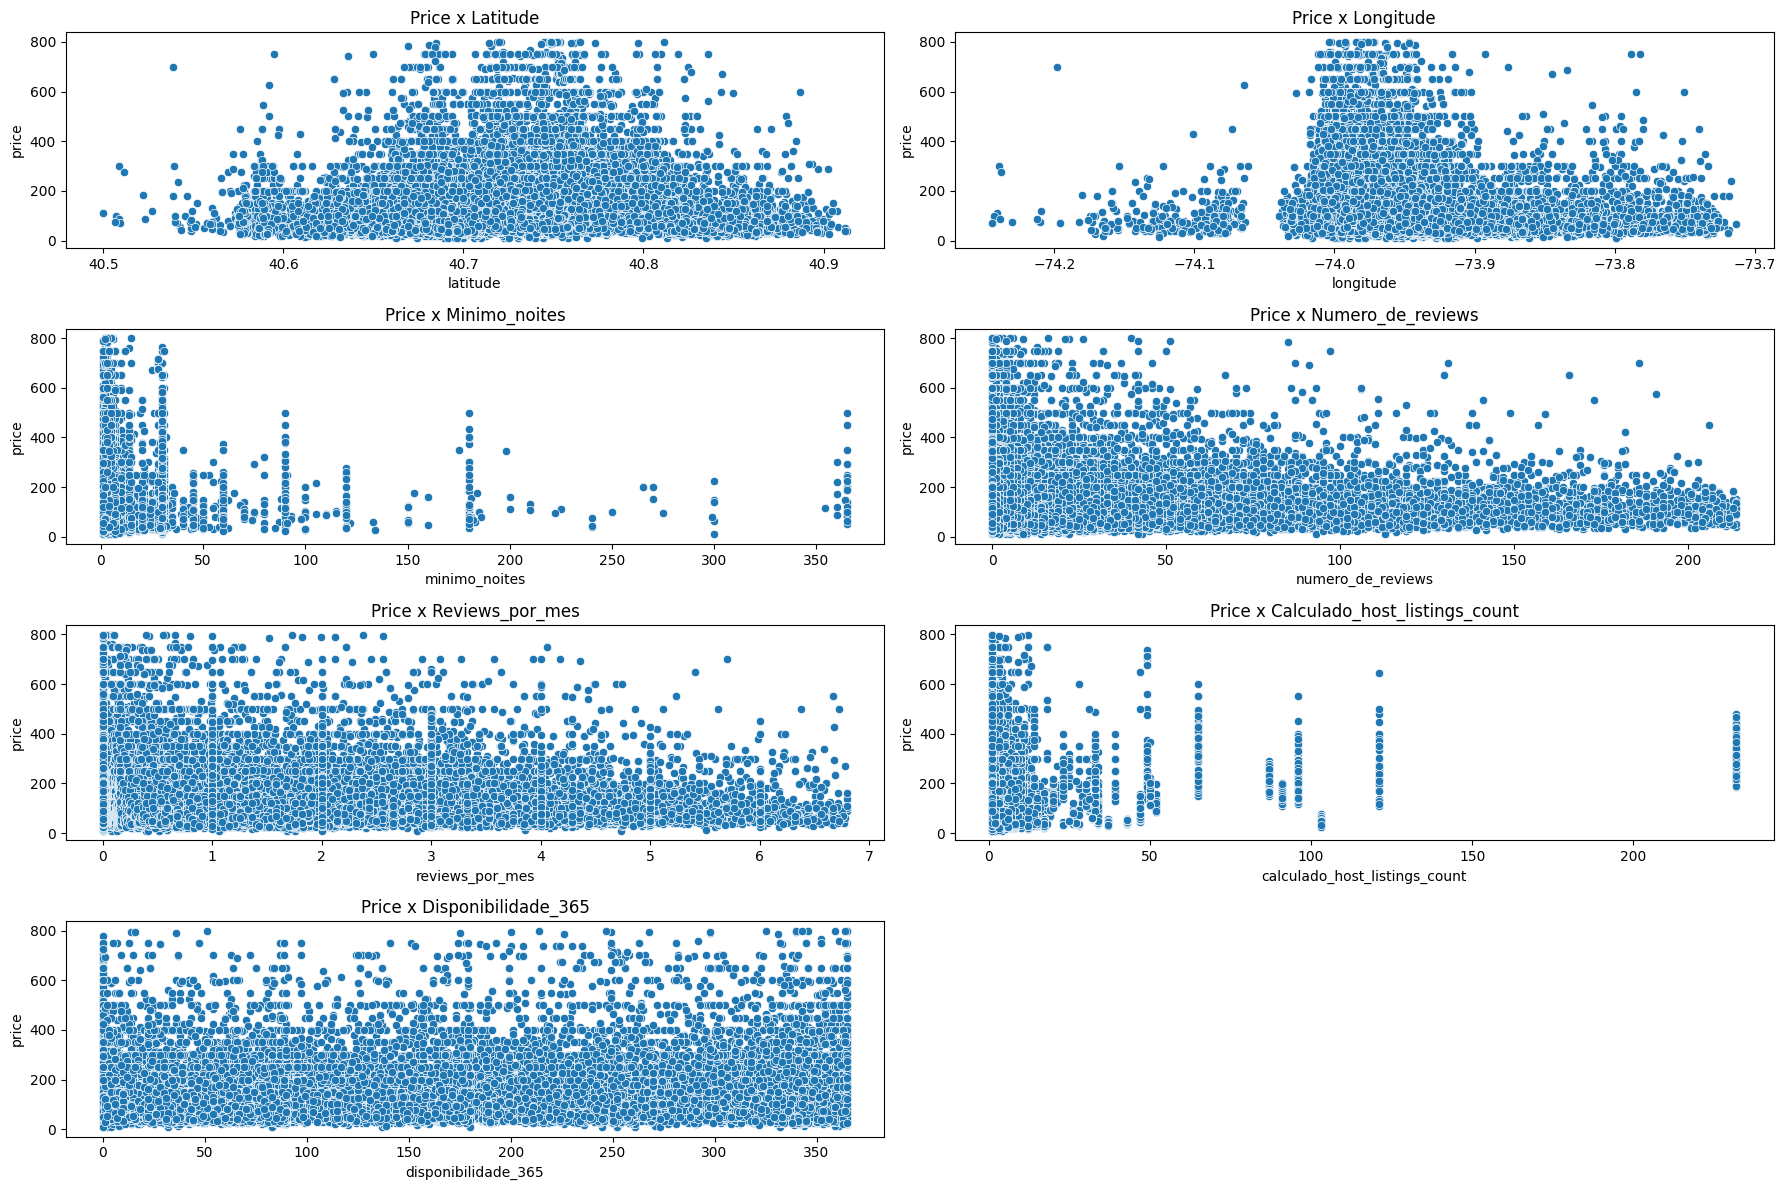

In [10]:
visualizer.num_features_vs_target(4, 2, "price")

In [17]:
df["numero_de_reviews"].value_counts(normalize=True).head()

numero_de_reviews
0    0.205622
1    0.109648
2    0.072336
3    0.052789
4    0.041680
Name: proportion, dtype: float64

### Observations:
- `Latitude` and `Longitude` showed that ads that are located at the extreme points of the coordinates values are the cheaper options, with `longitude` being the one with a more clear correlation to the price
- `minimo_noites` is an interesting feature. It would seem that the higher its value, the lower the price. But when it gets to around 30, we see that there are ads on all prices, and then again when the value gets to around 90, 180, 300 and 365, showing that the feature might have a non-linear relation with the target
- `numero_de_reviews` can be a little misleading. The majority of ads have 0 reviews, but the graph shows that the higher the number of reviews, the lower the max price that it's possible to find (in general). This can be attributed by different reasons, for example, ads with a lot of reviews can indicate that the place has a high rate of booking, which means that the host can easily find someone to book the ad and is a constant form of income, so the host knows that to remain competitive, the price needs to decrease. For the ads with no reviews, it can be newer ads where the host doesn't know the price that attracts the most attention, so the price ranges from the minimal to the max
- `reviews_por_mes` follows the same behavior as `numero_de_reviews`
- `calculado_host_listing_count` shows similarities with `minimo_noites`
- `disponibilidade_365` doesn't appear to have any impact on price. It only shows that prices above 400 are a lot more difficult to find, with only 3% of ads with this price or higher
### Impact:
- We can investigate to see if `latitude` and `longitude` can be used with the categorical columns to show a clear price pattern
- `minimo_noites`, `calculado_host_listing_count`,  `numero_de_reviews` and `reviews_por_mes` showed a non-linear relation to the target, with `minimo_noites` and `calculado_host_listing_count` needing to be investigated further to confirm this relation
- `disponibilidade_365` can possibly be dropped since it doesn't appear to have an impact on price. The decision will be made at the end of the EDA, when it is analyzed with other features to check if it can be used to create new features

# Investigating `minimo_noites` and `calculado_host_listings_count`

In [27]:
# Creating two separate dataframes, one with "minimo_noites" bellow 30, and the other above or iqual to 30
df_nights_bellow_30 = df.loc[df["minimo_noites"] < 30, ["minimo_noites", "price"]]
df_nights_above_30 = df.loc[df["minimo_noites"] >= 30, ["minimo_noites", "price"]]

In [30]:
# Initializing the Visualization class for each new dataframe created to plot the relation between "minimo_noites" and "calculado_host_listings_count" with price
visualizer_nights_bellow_30 = Visualization(df_nights_bellow_30)
visualizer_nights_above_30 = Visualization(df_nights_above_30)
visualizer_all_nights = Visualization(df[["minimo_noites", "price"]])
visualizer_host = Visualization(df[["calculado_host_listings_count", "price"]])

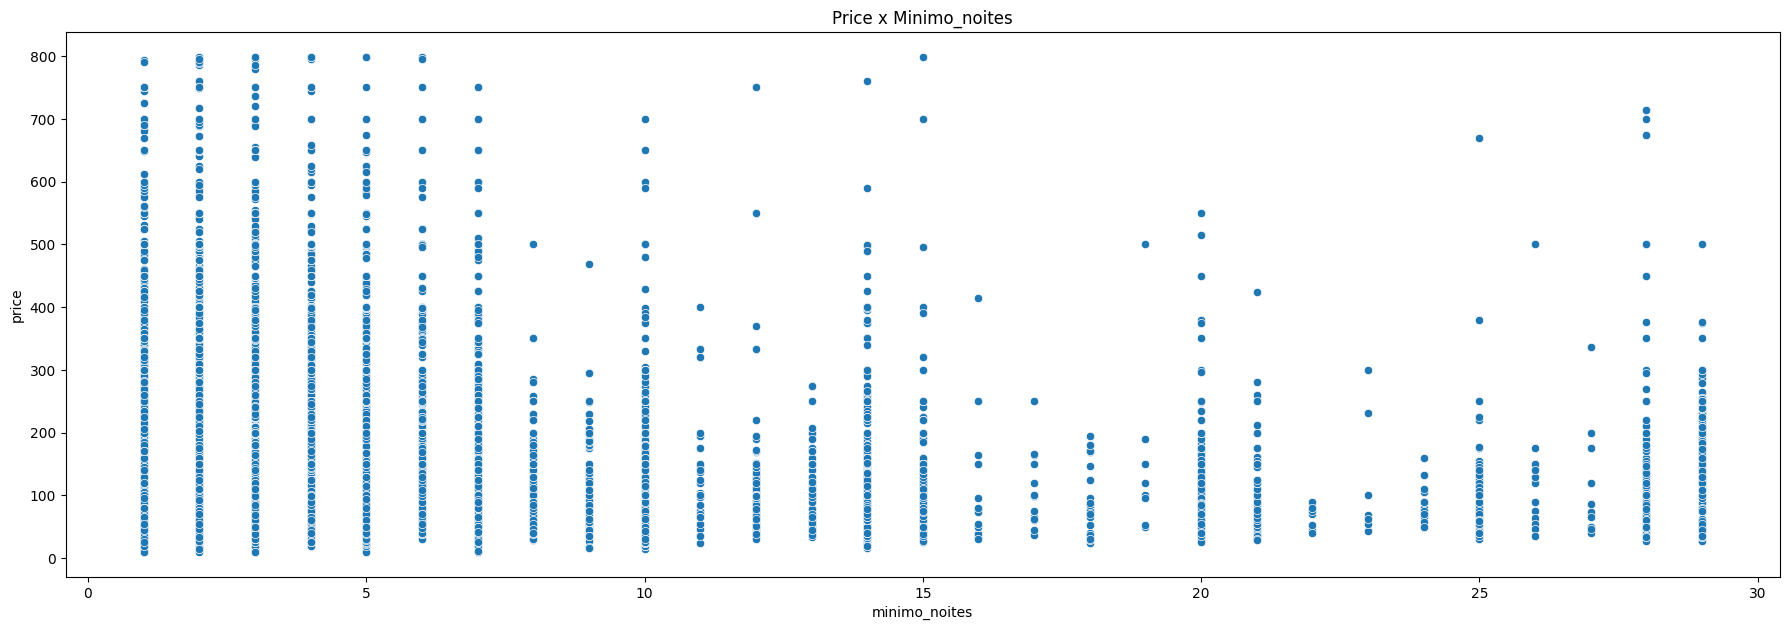

In [33]:
visualizer_nights_bellow_30.num_features_vs_target(2, 1, "price")

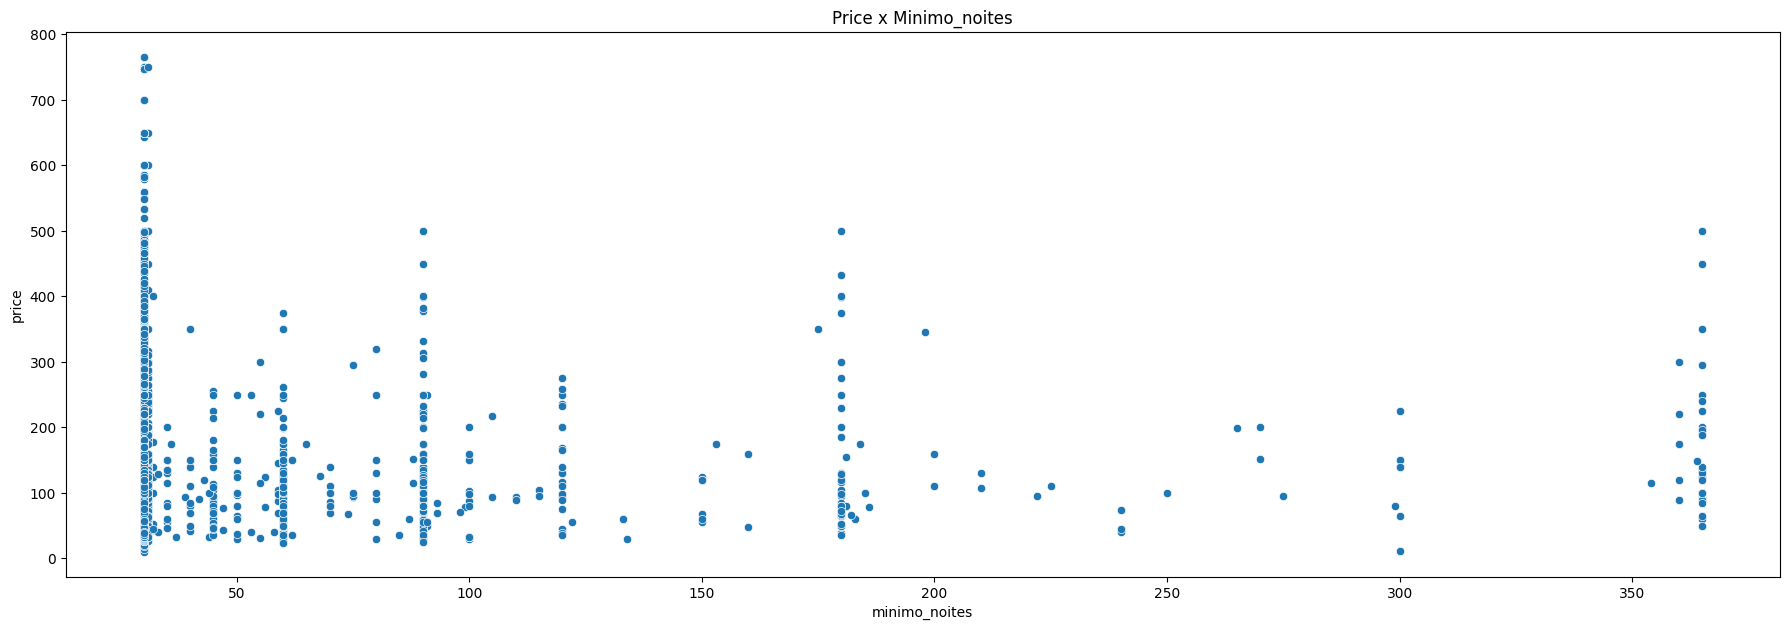

In [34]:
visualizer_nights_above_30.num_features_vs_target(2, 1, "price")

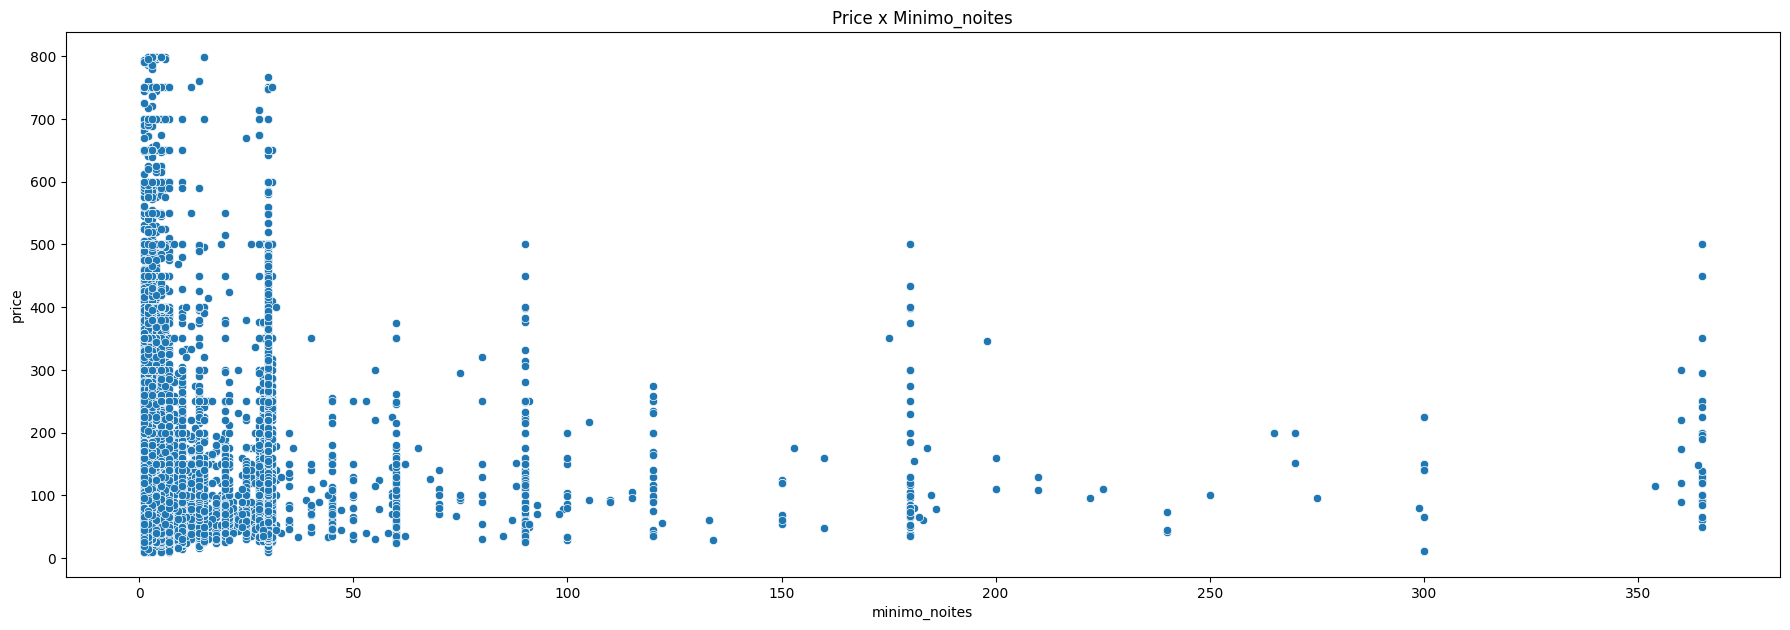

In [35]:
visualizer_all_nights.num_features_vs_target(2, 1, "price")

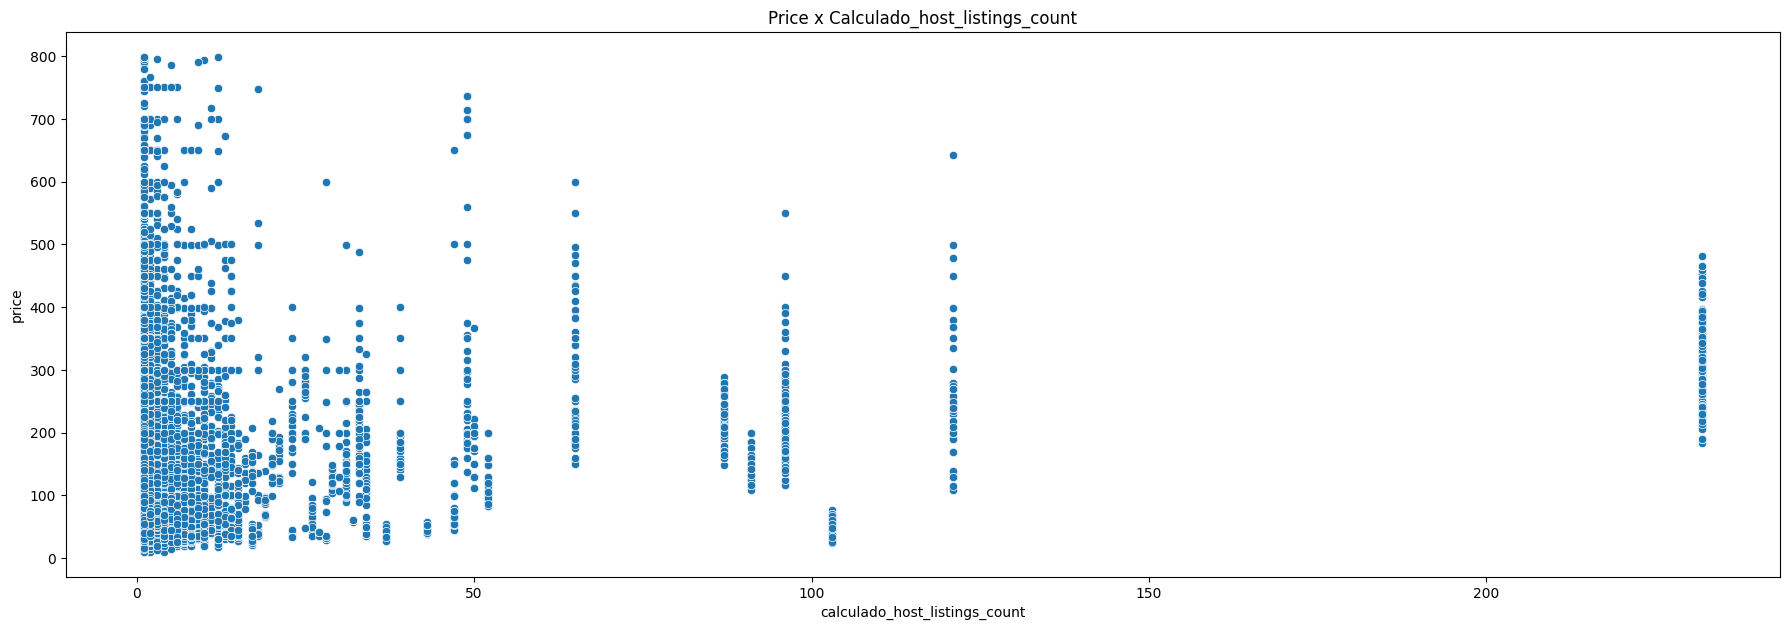

In [36]:
visualizer_host.num_features_vs_target(2, 1, "price")

### Observations:
- When the values of `minimo_noite` are below 30, it is possible to see a non-linear pattern with some outliers
- From values of 30 and above, we see that prices tend to decrease as the minimal nights increases, excluding some explicit values like 30, 90, 180 and 365
- When plotting the hole column, it's possible to see an exponential non-linear relation with `price`, but with a few values of `minimo_noites` being outliers
- `calculado_host_listings_count` doesn't appear to have the same impact as `minimo_noites`. For the first values, an argument can be made that the price tends to fall the higher the value is, but then it's just completely random

### Impact:
- `minimo_noites` does have an impact on price, but because of the outliers values, it may not have a very big impact on the model
- `calculado_host_listings_count` should be further investigated

## Categorical Features

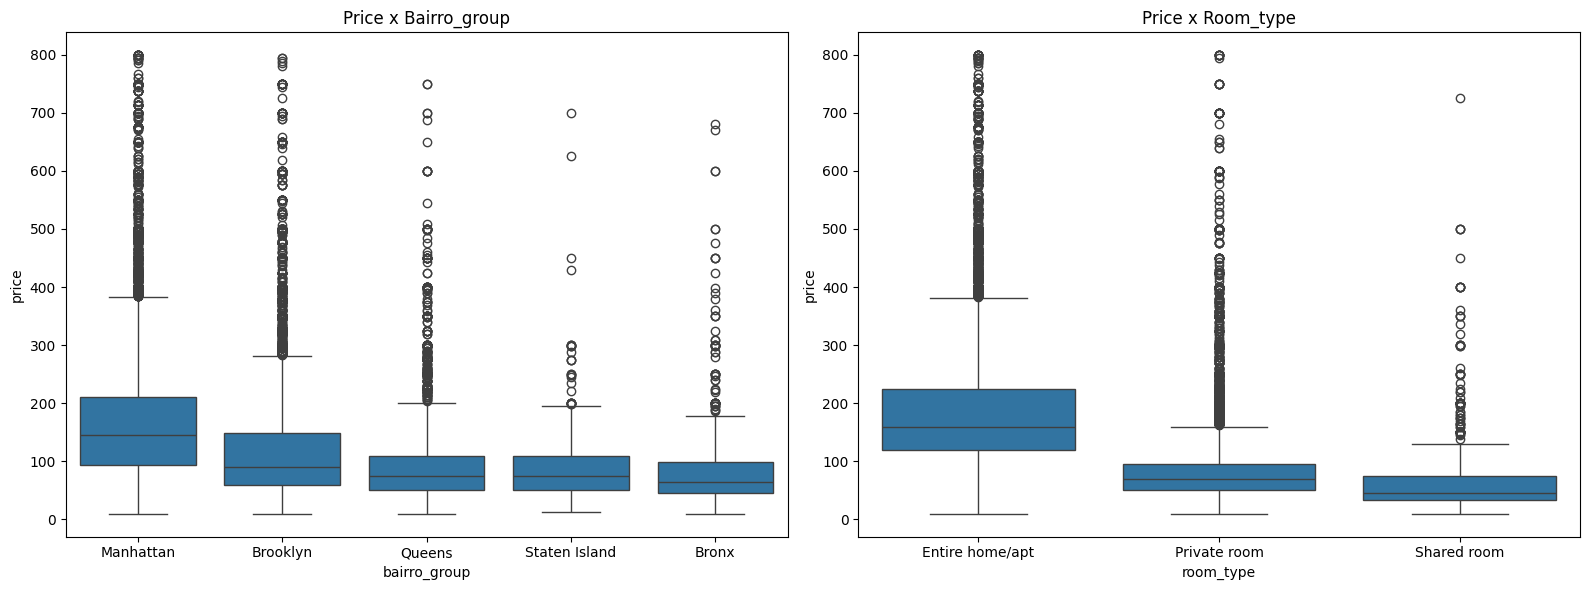

In [18]:
visualizer.cat_features_vs_target(1, 2, "price", ["bairro_group", "room_type"], figsize=(16, 6))

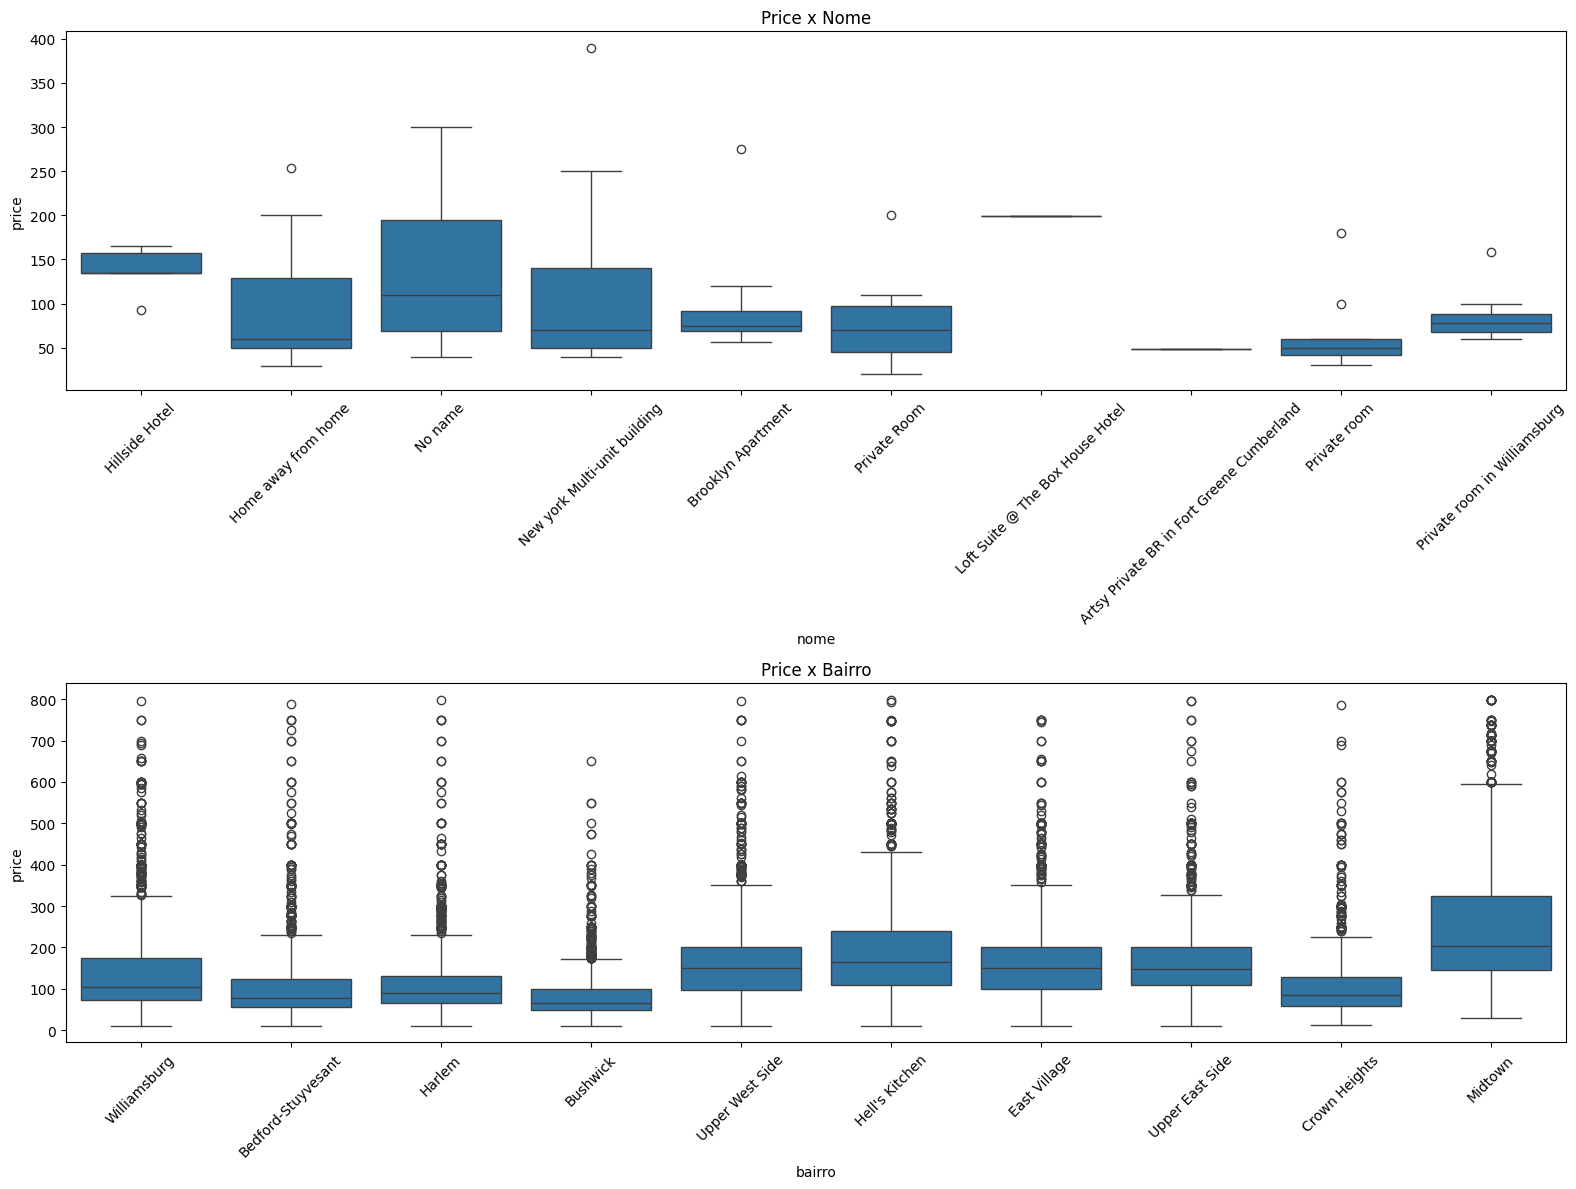

In [38]:
visualizer.cat_features_vs_target(2, 1, "price", ["nome", "bairro"], figsize=(16, 12))

### Observations:
- Although all neighborhoods have outliers that reach extreme high prices, `bairro_group` shows that the most expensive location is Manhattan, with its median being higher than the upper limit of all other neighborhood groups boxes. Brooklyn is the second most expensive, but its median is at the same level as the others, suggesting that there's a very big price fluctuation there, since its upper box limit is close to the median of prices in Manhattan, but the lower limit is at the same level as all the others
- Entire home/apt is by far the most expensive choice in `room_type` to rent. Despite private rooms being the second most popular room type, they are considerably cheaper than the entire home/apt, showing that booking ads for entire homes/apts is only worth it if the client absolutely needs one. Shared room is the cheapest option, but the expensive ones, at the upper limit of the box, have the same price as the median price of a private room, making private rooms even more attractive
- For the `nome` column, the 10 most frequent listings are plotted. We can see that both hotels have high prices, and their boxes are almost completely flat, indicating that the prices tend to be the exact same for them. New york Multi-unit building has the second widest box, which makes sense, since it is priced based on the luxury and floor of the apartment
- For `bairro`, again the 10 most frequent values were plotted. Midtown is the most expensive place, and it's located in Manhattan, so it makes sense to be. All other locations are very similarly priced, with a few locations being a little underpriced compared to the others. The location with the second highest prices is Hell's Kitchen, located in Brooklyn, which is also the second most expensive place

# Multivariable Analysis

## Room_type x Numericals

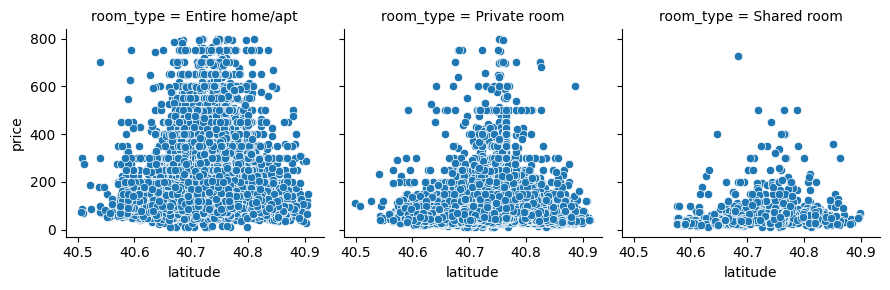

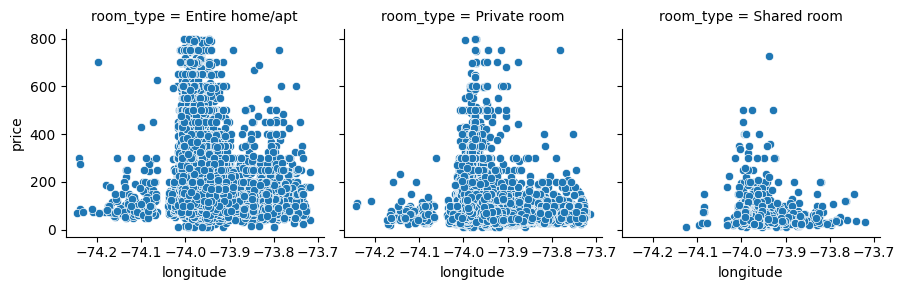

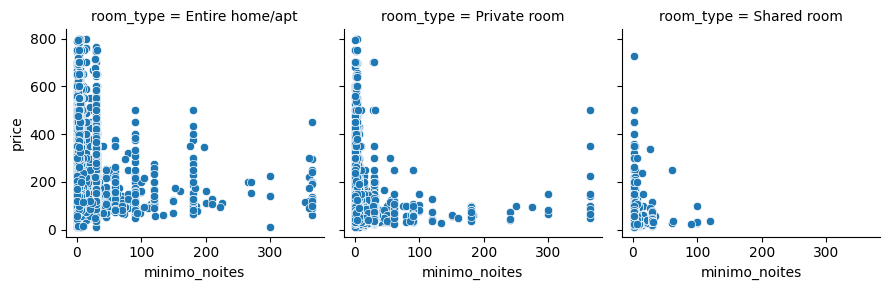

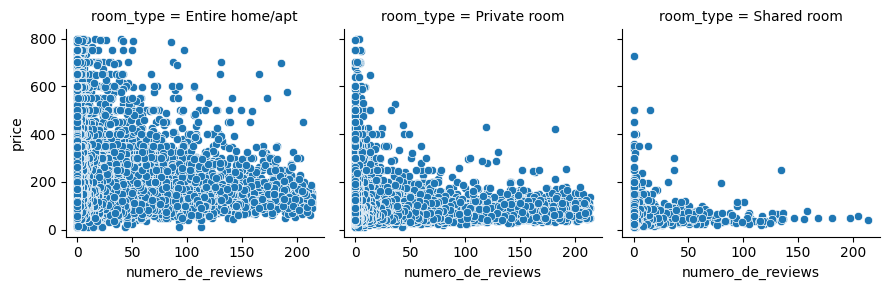

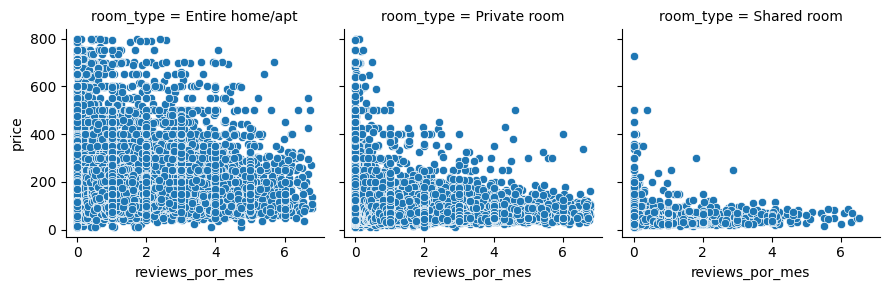

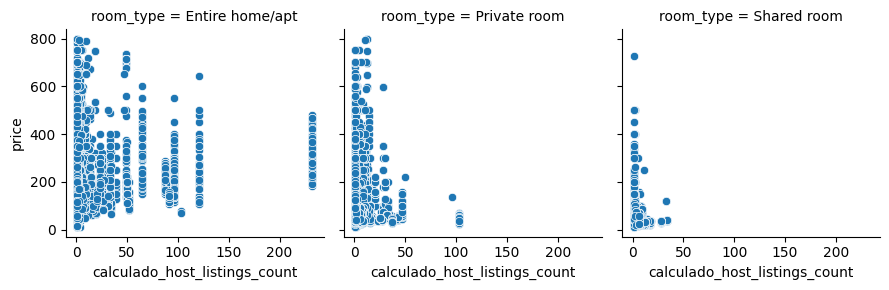

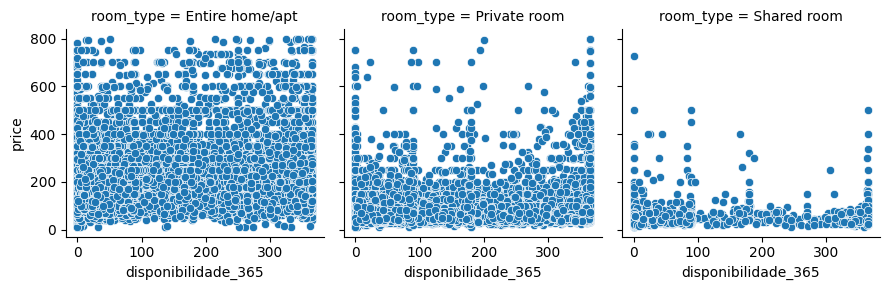

In [37]:
visualizer.facegrid_hist_target(facecol="room_type", target="price")

### Observations:
- `latitude` and `longitude` showed the same behavior as before, where the higher prices are concentrated on the center points of the coordinates
- `minimo_noites` confirms the behavior that was investigated. For private rooms and shared rooms, we can clearly see a non-linear relation to the price, and for entire home/apt, the relation is visible, with a few points being outliers
- `numero_de_reviews` show a clear pattern where the max price tends to decrease when the ad has a lot of reviews, this being especially true for private rooms and shared rooms. The same thing can be seen with `reviews_por_mes`, but with a difference in regard to the entire home/apt category, where there was basically no effect on price whether the ad has a lot of reviews per month or not
- `calculado_host_listings_count` shows a similar behavior as `minimo_noites`, but it should be further investigated
- `disponibilidade_365` again showed no practical effect on price, no matter the room type

## Bairro_group x Numericals

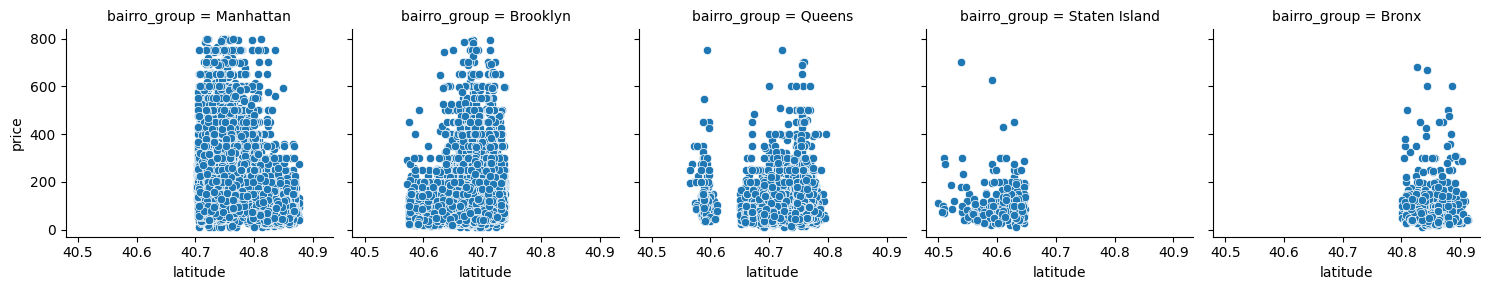

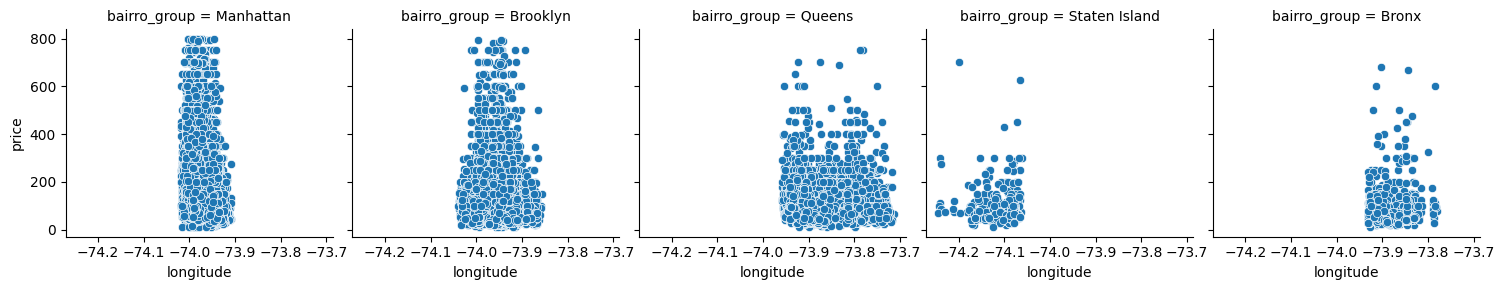

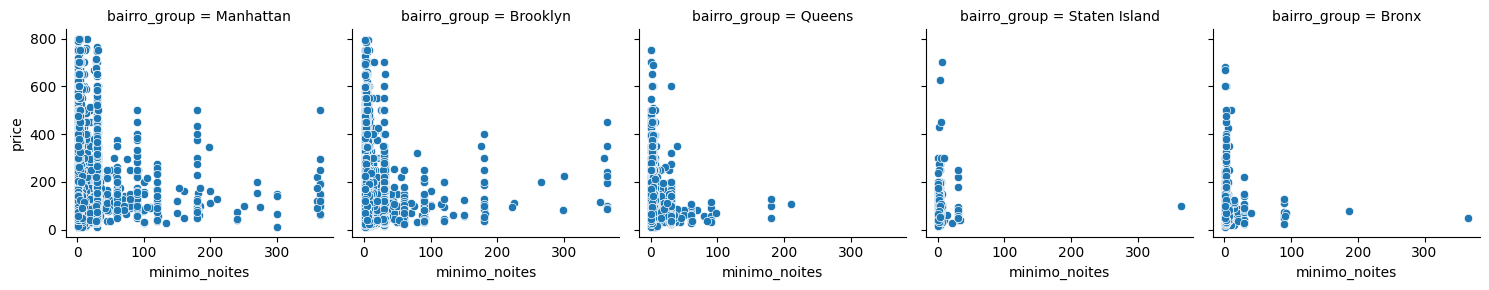

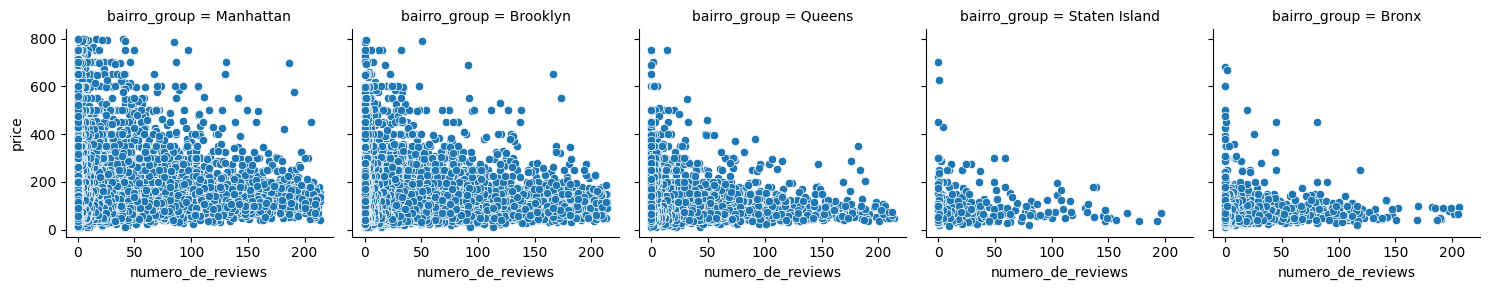

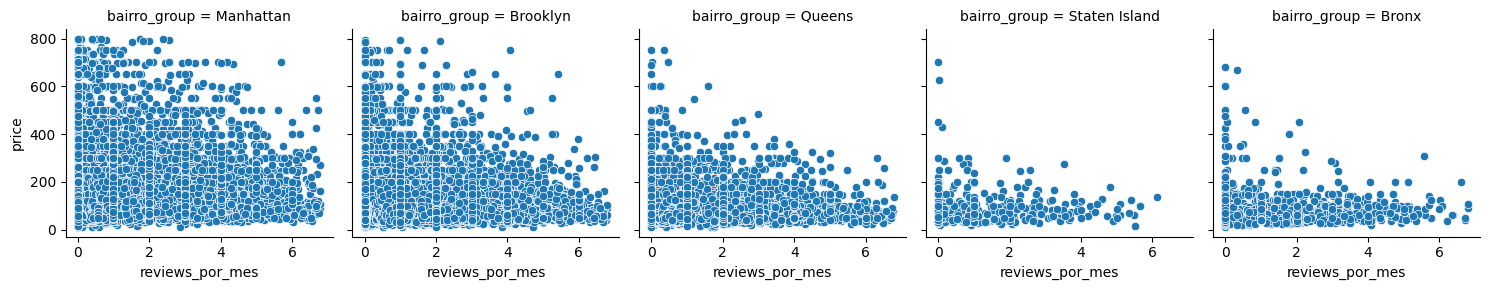

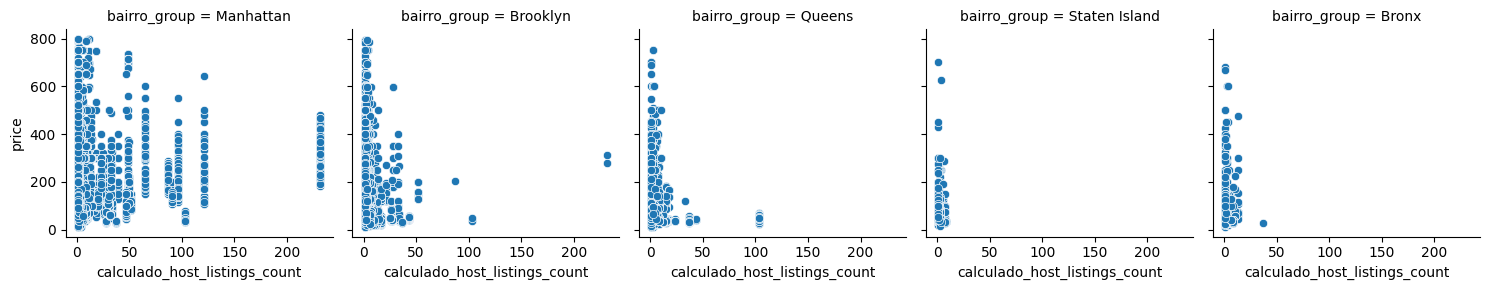

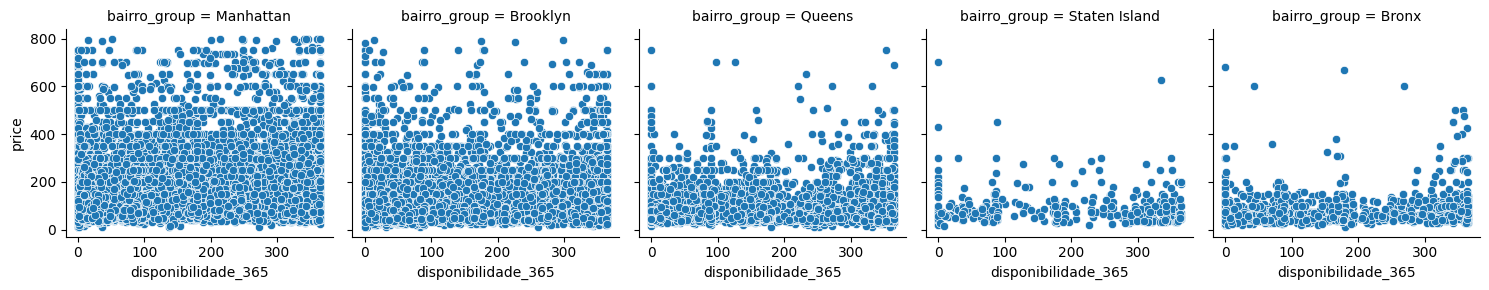

In [39]:
visualizer.facegrid_hist_target(facecol="bairro_group", target="price")

### Observations:
- `latitude` and `longitude` showed an excelent behavior in relation to price when sorted by area. It's clear that the neighborhoods located more on the center of the values of both columns tend to be more expensive, and the ones located on the extremes tends to be the cheapest
- `minimo_noites`, `numero_de_reviews` and `reviews_por_mes` showed the same non-linear relation to the price, with the relation being most visable on `numero_de_reviews` and `reviews_por_mes`
- There's no real information from `calculado_host_listings_count` since, excluding Manhattan, all other places have almost all hosts with 0 listings
- `disponibilidade_365` showed no relation with price

## Latitude and Longitude x Numericals

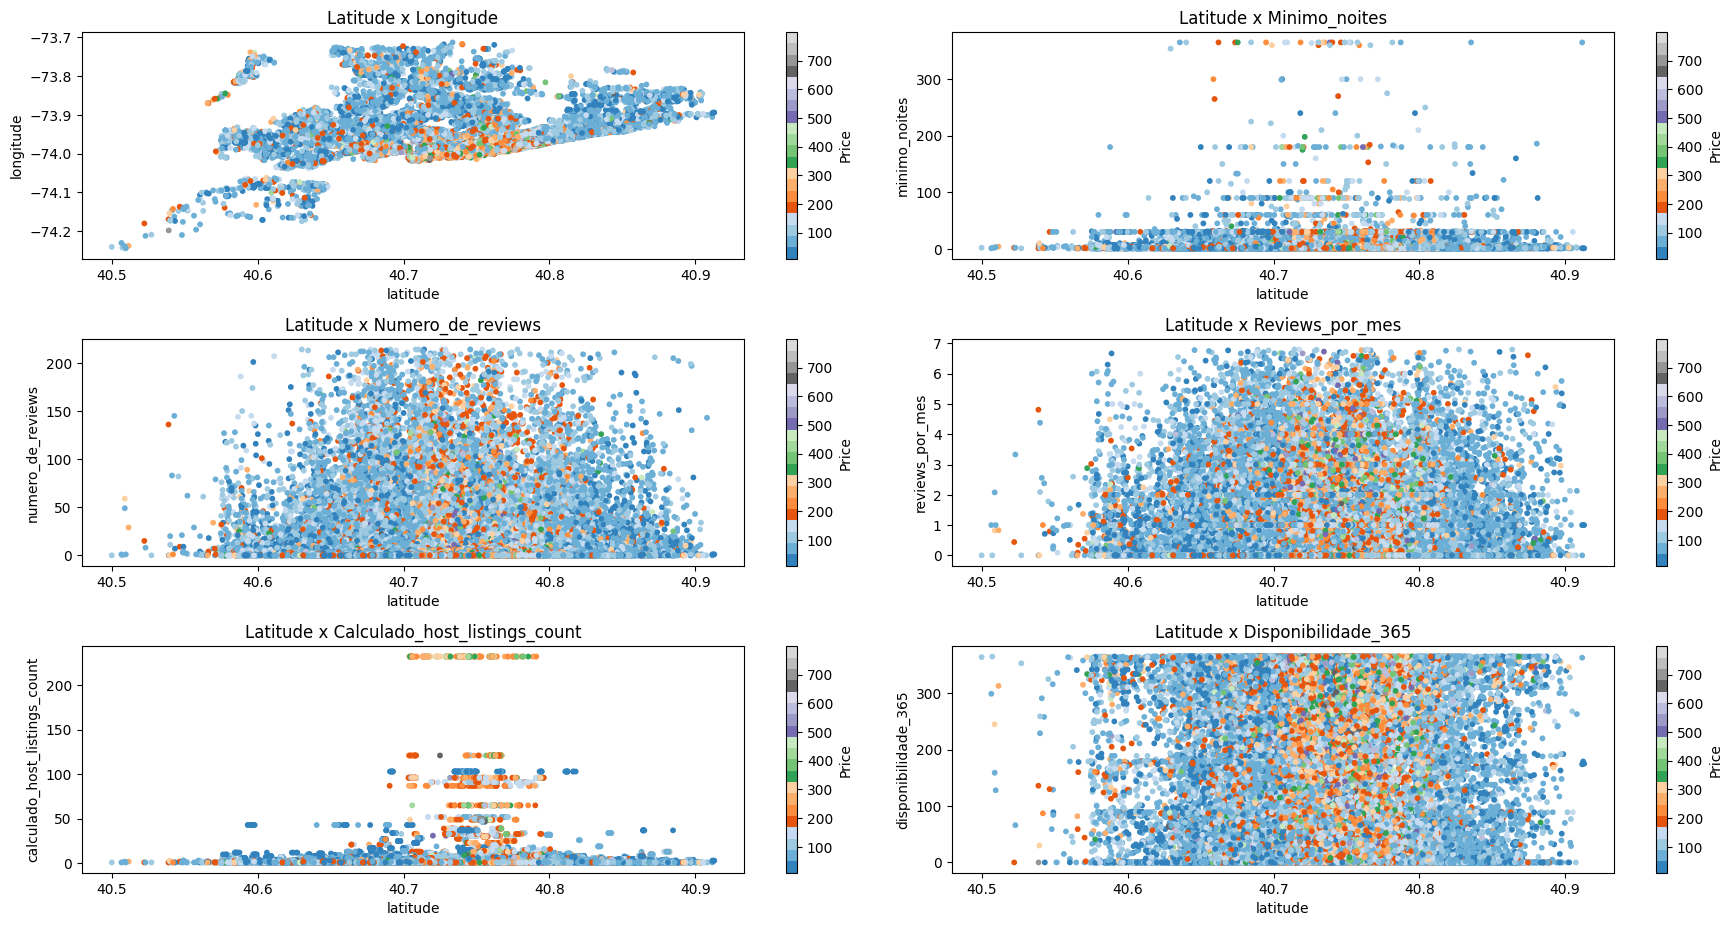

In [40]:
visualizer.plot_scatter_numericals_target(4, 2, "price", "latitude")

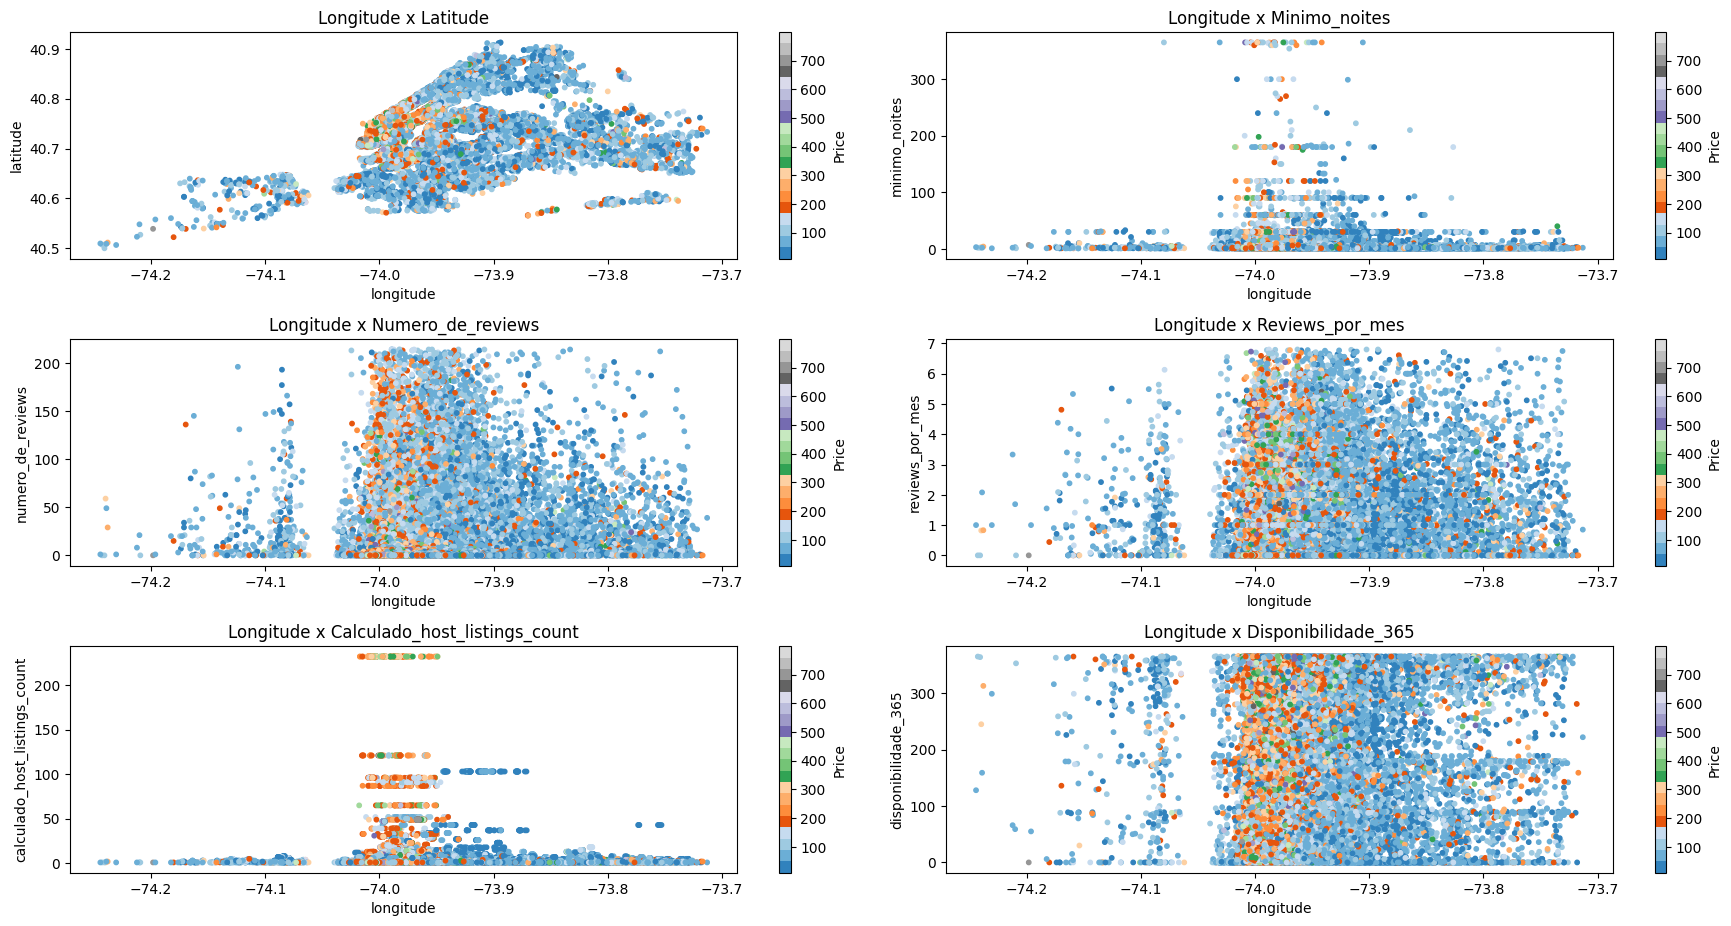

In [41]:
visualizer.plot_scatter_numericals_target(4, 2, "price", "longitude")

### Observations:
- The same behavior has been demonstrated in these columns since the beginning of the analysis, the price tends to be higher when in the ad is located in the center of them

## Minimo_noites, numero_de_reviews, reviews_por_mes x Numericals

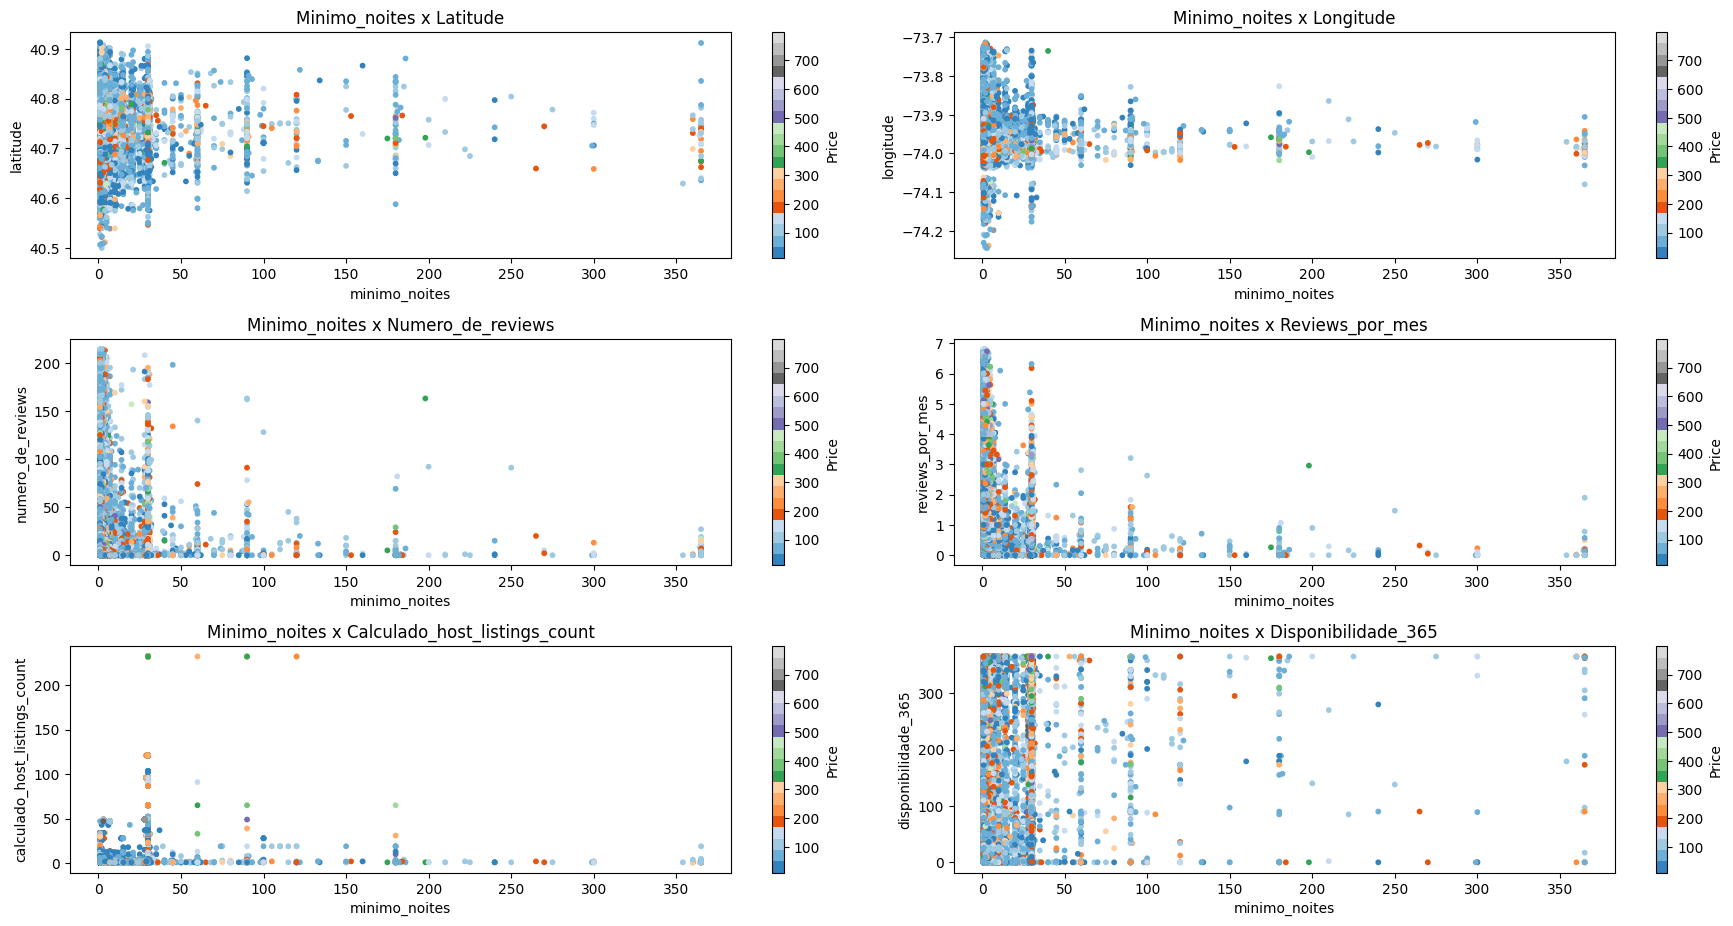

In [42]:
visualizer.plot_scatter_numericals_target(4, 2, "price", "minimo_noites")

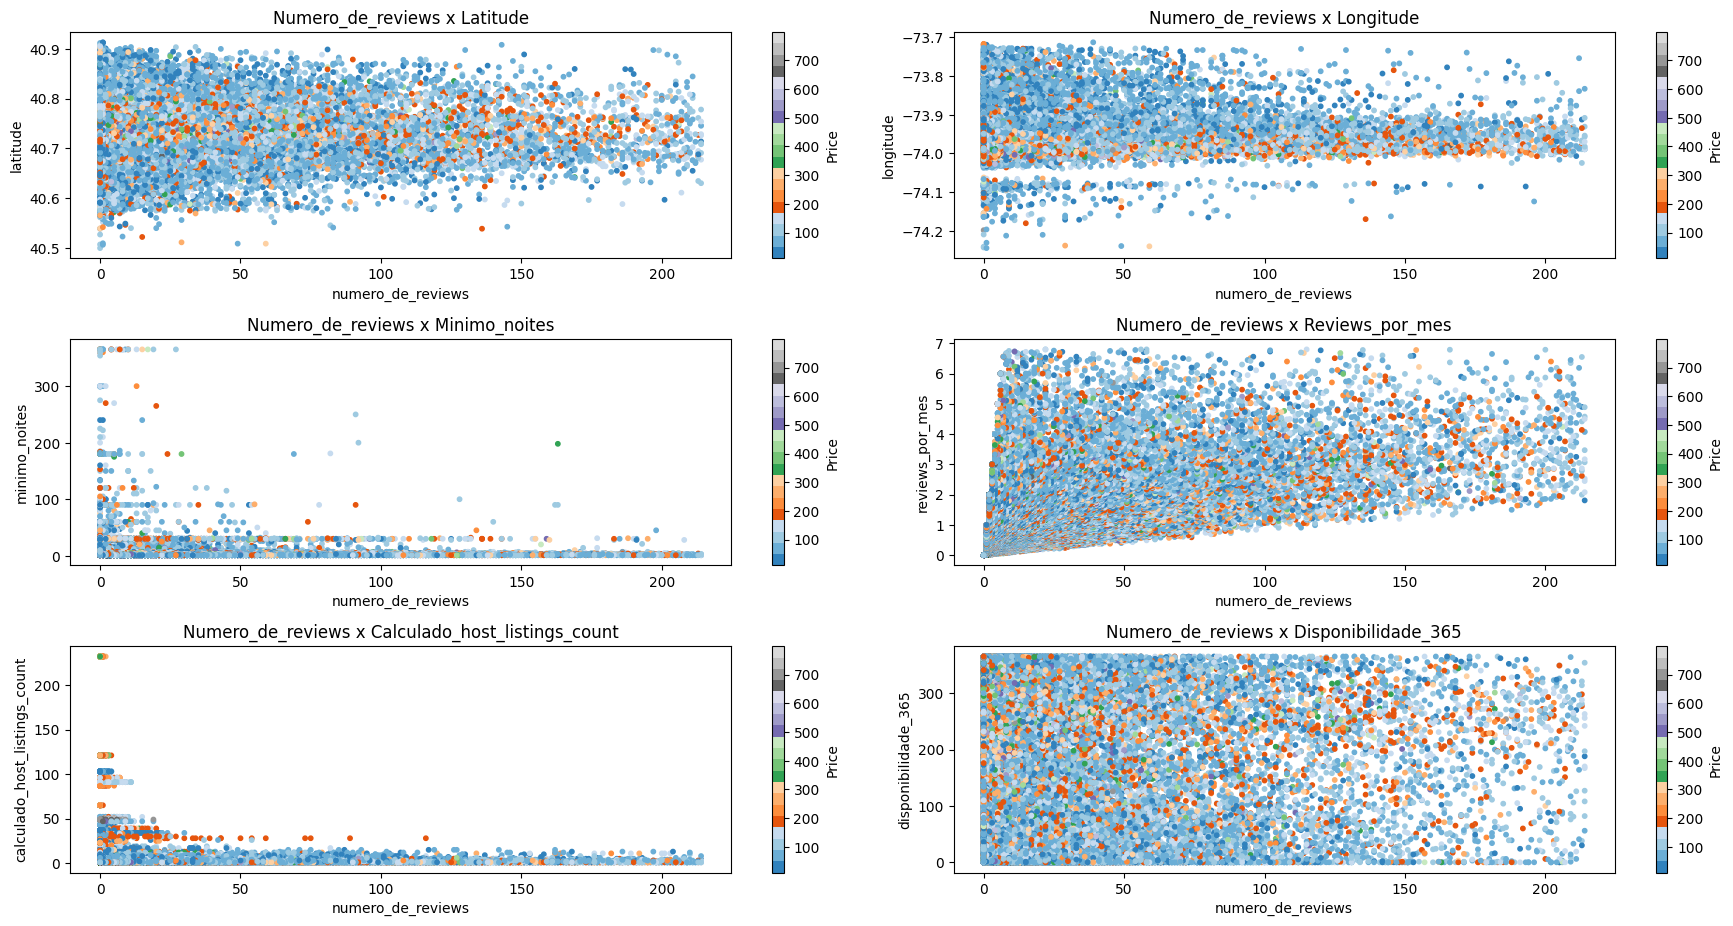

In [43]:
visualizer.plot_scatter_numericals_target(4, 2, "price", "numero_de_reviews")

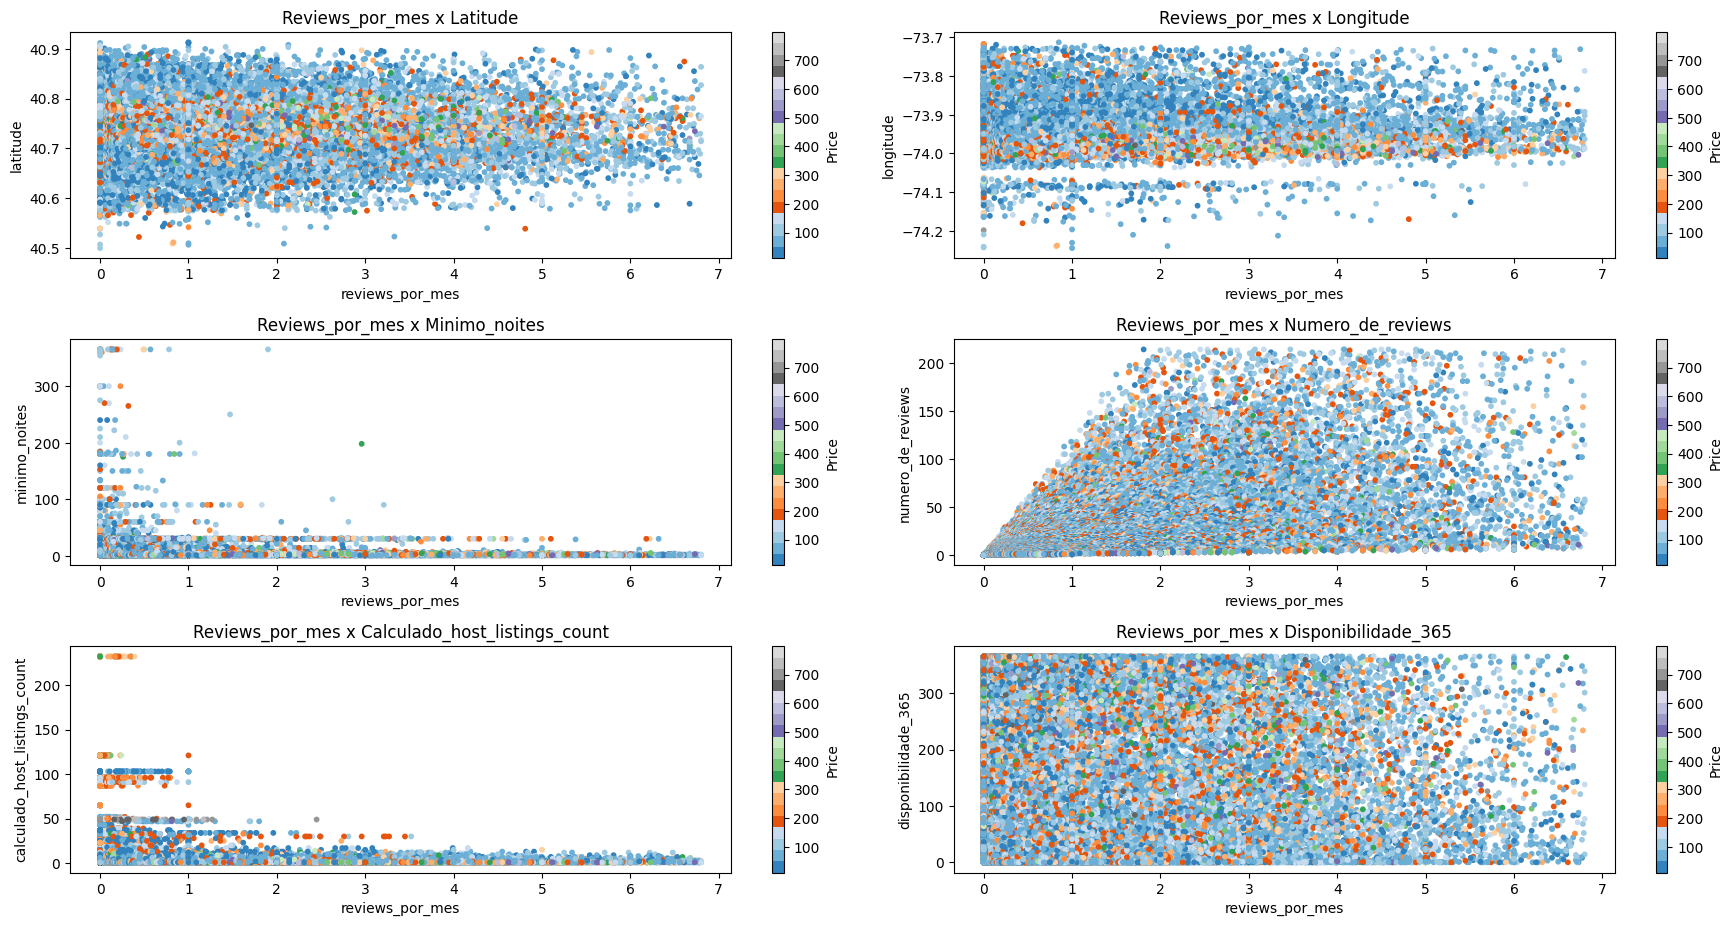

In [44]:
visualizer.plot_scatter_numericals_target(4, 2, "price", "reviews_por_mes")

### Observations:
- There's no eye-catching behavior when plotting these columns against each other

# Where to buy an apartment to rent on the platform?

### As we saw before, the most expensive ads are located on the central region of the coordinates and on the Manhattan area
### To be more specific, lets get the top 15 most listed locations

In [4]:
df["bairro"].value_counts().head(15)

bairro
Williamsburg          3842
Bedford-Stuyvesant    3620
Harlem                2598
Bushwick              2415
Upper West Side       1900
Hell's Kitchen        1871
East Village          1801
Upper East Side       1749
Crown Heights         1536
Midtown               1476
Greenpoint            1102
East Harlem           1086
Chelsea               1064
Washington Heights     887
Astoria                882
Name: count, dtype: int64

### Let's also get the top 15 most expensive neighborhoods, along with its region, how many times they were listed and the overall number of reviews

In [5]:
# Group the DataFrame by the "bairro" column and calculate aggregate statistics
top_expensive_neighborhoods = df.groupby("bairro").agg({"price": "mean", 
                                                        "bairro_group": lambda x: x.unique(), 
                                                        "bairro": "size", 
                                                        "numero_de_reviews": "sum"})
top_expensive_neighborhoods.rename(columns={"bairro": "times_listed"}, inplace=True)

# Retrieve the top 15 most expensive neighborhoods based on the average price
top_expensive_neighborhoods.nlargest(15, "price")

price     bairro_group  times_listed  \
bairro                                                         
Woodrow            700.000000  [Staten Island]             1   
Tribeca            294.389610      [Manhattan]           154   
NoHo               276.246753      [Manhattan]            77   
Neponsit           274.666667         [Queens]             3   
Flatiron District  258.162162      [Manhattan]            74   
Midtown            257.266938      [Manhattan]          1476   
Willowbrook        249.000000  [Staten Island]             1   
SoHo               230.273810      [Manhattan]           336   
West Village       224.776871      [Manhattan]           735   
Chelsea            213.502820      [Manhattan]          1064   
Breezy Point       213.333333         [Queens]             3   
Murray Hill        208.744681      [Manhattan]           423   
Theater District   207.181070      [Manhattan]           243   
Greenwich Village  206.428191      [Manhattan]           376   
Battery Park City  198.469697      [Manhattan]            66   

                   numero_de_reviews  
bairro                                
Woodrow                            0  
Tribeca                         1504  
NoHo                             956  
Neponsit                          46  
Flatiron District               1237  
Midtown                        17878  
Willowbrook                        9  
SoHo                            6756  
West Village                   13870  
Chelsea                        21142  
Breezy Point                       5  
Murray Hill                     3701  
Theater District                3138  
Greenwich Village               6346  
Battery Park City                580

### As it was shown previously, the higher the number of reviews, the lower the price tends to get, but it also means that the host can easily book the ad. Also, the amount of times that a neighborhood is listed can indicate how popular it is, bringing even more attention to the ad.
### Based on the dataframe above, it's possible to see that there's three locations that matches the parameters of having a high number of reviews and a high number of listings, and all of them are located in the area of Manhattan, which is the most popular area. From here, three possible conclusions can be drawn:
- Number 1: If you absolutely need that your apartment gets lots of reviews and is in the top 10 most frequent neighborhoods, you should buy at **Midtown**
- Number 2: If you want the maximum amount of reviews, to ensure that you get a passive income, and is in the top 15 most frequent neighborhoods, you should buy at **Chelsea**
- Number 3: If you want a high number of reviews and a neighborhood that is not listed as often as the other two, therefore is less competitive, and your ad has a higher chance to be seen when the user searches for this specific neighborhood, you should buy at **West Village**
### Assuming that you want to buy the apartment in an very popular area of the city and that you want something that has the highest possible average price of rent per night with a very good number of reviews, to ensure that you always have clients to book your ad, we can use conclusion number 1. You should buy an apartment in **Midtown**

# Is there a pattern on the name of the ads of high-end places?

In [6]:
# Get the top 15 most expensive neighborhoods, filter listings from these areas, extract their names, and analyze them using TextPattern
top_15_expensive_areas = top_expensive_neighborhoods.nlargest(15, "price").index
ads_in_expensive_areas = df[df['bairro'].isin(top_15_expensive_areas)]
expensive_ads_names = ads_in_expensive_areas['nome'].tolist()
text_pattern = TextPattern(expensive_ads_names)

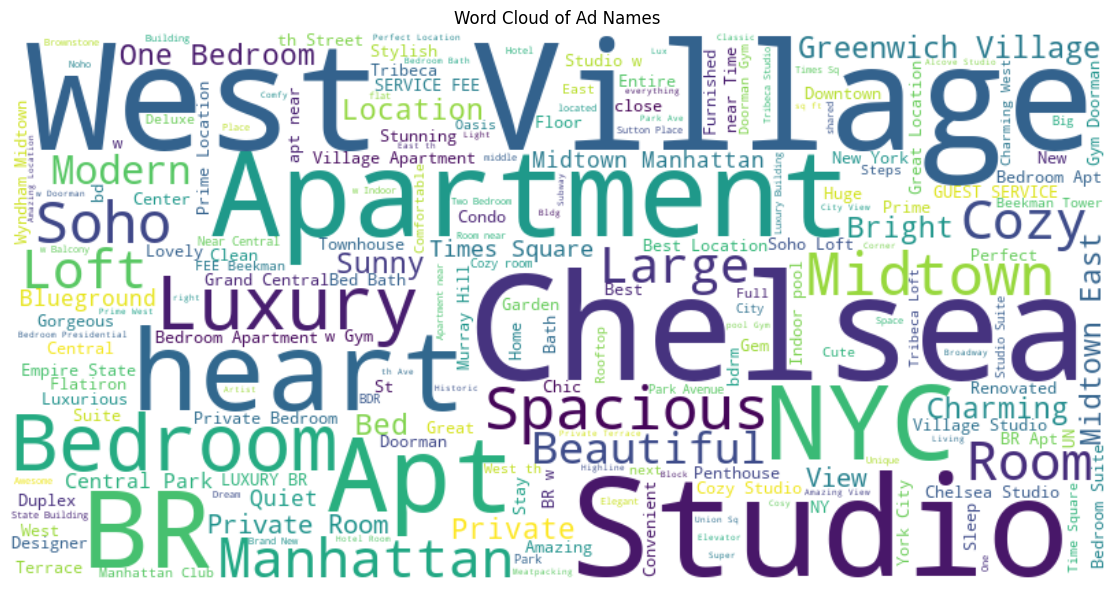

In [7]:
text_pattern.wordcloud()

### The WordCloud shows that ads for the top 15 most expensive locations mostly use location names along with some adjectives like **Luxury** or **Cozy**. So the priority is to explicitly say in which location the ad is, and then to fill the rest of the description with adjectives and characteristics of the home/apartment.

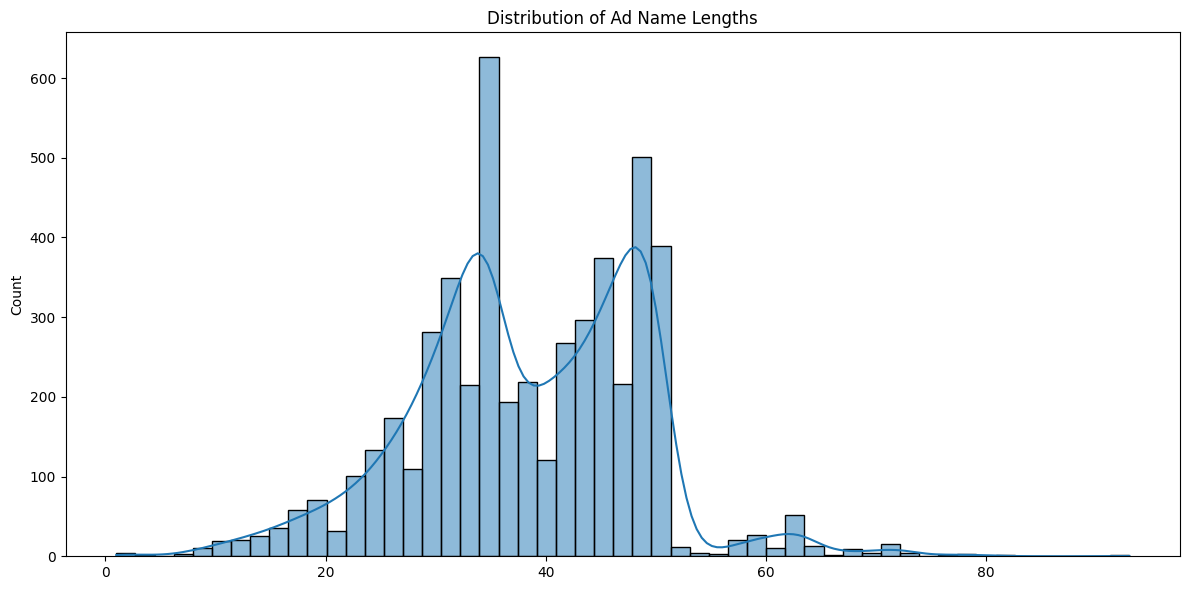

In [10]:
text_pattern.ad_name_lengths()

### From the distribution of lengths, we can conclude that these ads tend to have around 35 characters in their names, or 45 to 50, with other lengths being much less found

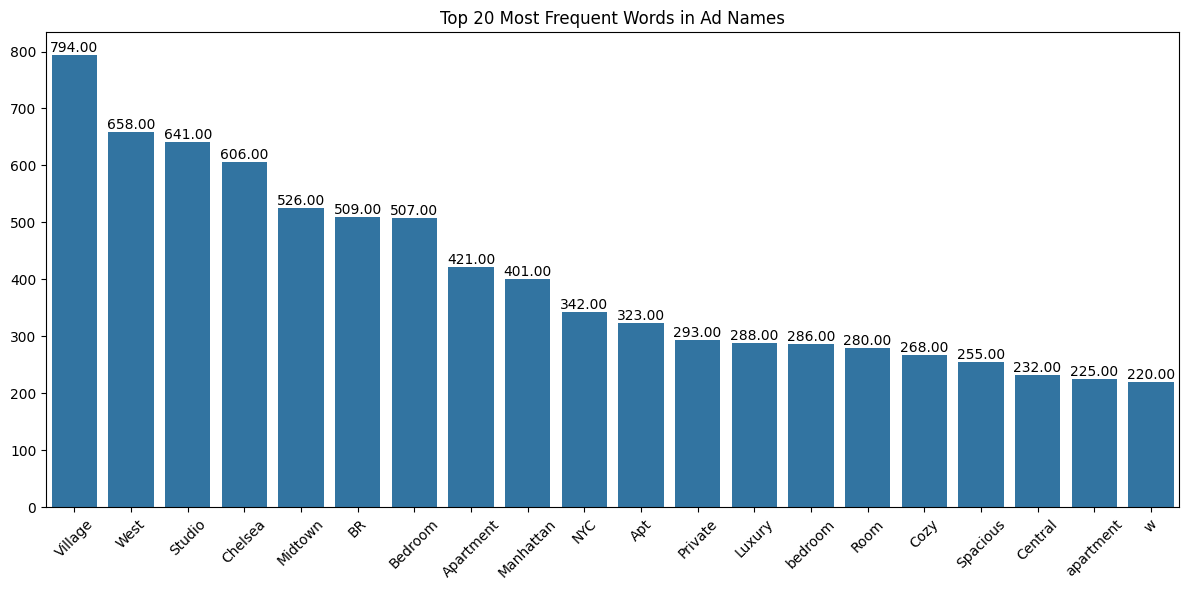

In [11]:
text_pattern.word_frequencies()

### From the barplot with the top 20 most frequent words, location names are the most used, indicating the same thing as the WordCloud, that the location is extremely important to put on the ad. Along with the locations, adjectives and characteristics of the place fill the rest of the top 20 words list

### In conclusion, it's possible to see a pattern on the name of the ads for the most expensive locations, that being the use of the location and then to fill the rest of the name with adjectives and characteristics, keeping everything between 35 or 45-50 characters.

# Summary

### Main Insights:
- Excluding the coordinates columns, all others have a heavily positively skewed distribution, with mode < median < mean
- `bairro_group` shows that Manhattan and Brooklyn are by far the most popular locations, with approximately 40 thousand ads in these two neighborhood groups
- `room_type` is dominated by the categories entire home/apt and private room, which is understandable
- `latitude` and `longitude` showed an excellent behavior in relation to price when sorted by area. It's clear that the neighborhoods located more in the center of the values of both columns tend to be more expensive, and the ones located at the extremes tends to be the cheapest
- `numero_de_reviews` can be a little misleading. The majority of ads have 0 reviews, but the graph shows that the higher the number of reviews, the lower the max price that it's possible to find (in general). This can be attributed by different reasons, for example, ads with a lot of reviews can indicate that the place has a high rate of booking, which means that the host can easily find someone to book the ad and is a constant form of income, so the host knows that to remain competitive, the price needs to decrease. For the ads with no reviews, it can be newer ads where the host doesn't know the price that attracts the most attention, so the price ranges from the minimal to the max. `reviews_por_mes` follows the same behavior as `numero_de_reviews`
- The column `minimo_noite` does have an impact on price with a non-linear relation, but because of the outliers that don't follow this relation, it may not have a very big impact on the model. Also, for private rooms and shared rooms, we can clearly see a non-linear relation to the price, and for entire home/apt, the relation is visible, with a few points being outliers
- `disponibilidade_365` doesn't have an impact on price

### Implications for Feature Engineering and Modelling
- It would be interesting to test some methods to try to make columns distributions more closely to a Gaussian one
- The categorical features appear to have a large impact on price
- Based on the information in the coordinates features, it's possible to create a new feature containing all the distances to the city center, since the prices are higher when the ad is located closer to the center of the coordinates
- `numero_de_reviews`, `reviews_por_mes` and `minimo_noite` all show a non-linear relation with the price, so the models for testing needs to be ones that can handle this type of relation
- `calculado_host_listing_count` can be investigated with a correlation matrix to see if it is actually irrelevant to price
- `disponibilidade_365` can be dropped